**Importar los archivos**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import kstest

In [2]:
data = pd.read_json('hoteles.json')
df = pd.DataFrame(data)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,615,2017,March,11,16,0,2,2,...,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
1,City Hotel,1,615,2017,March,11,16,0,2,2,...,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
2,City Hotel,1,615,2017,March,11,16,0,2,2,...,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
3,City Hotel,1,615,2017,March,11,16,0,2,2,...,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015
4,City Hotel,1,615,2017,March,11,16,0,2,2,...,Non Refund,1,NULL,0,Transient,62.0,0,0,Canceled,21/10/2015


**Exploración de los datos**

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.info() #No existen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  object 
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe() #existen valores negativos en 'adr' y valor atipico de 54000

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df = df[df['adr'] > 0]
df = df[df['adr'] < 5400]
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000,117429.000000
mean,0.374780,105.084936,2016.160276,27.136900,15.802740,0.936430,2.521234,1.860631,0.007869,0.027872,0.086955,0.125335,0.216480,2.337957,103.485715,0.062642,0.571043
std,0.484068,106.907271,0.706567,13.575675,8.783578,0.995761,1.893744,0.482104,0.097169,0.164607,0.848693,1.446210,0.633187,17.677127,46.708039,0.245566,0.791657
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000


In [7]:
df['period'] = df[['arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1)
df['period'] = pd.to_datetime(df['period']) #agregamos una columna de tiempo (para la futura serie de tiempo)

In [8]:
df['cum_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights'] #Definimos una columna de noches reservadas cumulativa (week + weekend)

In [9]:
df['country'].replace('CN', 'CHN', inplace = True) #Cambiamos los registros 'CN' a 'CHN' pues ambos representan a China
len(df['country'].unique())

177

Se decidió eliminar todos los valores del adr (Average Dayly Rate) que fuesen menores a 0, pues algo no puede costar un valor negativo, ni se dan los cuartos gratis. Tambien se eliminó un caso en el que el adr era 5400 euros.

Además de esto se creó la columna 'period' que toma los datos de 3 de las columnas con información de tiempo para poder crear una sola columna con la fecha de reserva. Tambien se creó la columna 'cum_nights', la cual suma las noches reservadas entre semana y en fin de semana.
Ambas columnas seran utilizadas para futuro analisis.

Por último, en el registro de país se modificaron los registro 'CN' a 'CHN'

***¿De dónde vienen los huéspedes?***

In [10]:
df['country'].unique() #Checar que los países existan

array(['PRT', 'NLD', 'FRA', 'IRL', 'GRC', 'ESP', 'GBR', 'TUR', 'DEU',
       'BRA', 'DNK', 'LUX', 'ITA', 'USA', 'CHN', 'CHE', 'BEL', 'NOR',
       'ROU', 'AUT', 'SAU', 'POL', 'ISR', 'FIN', 'RUS', 'HUN', 'TUN',
       'ARG', 'SVN', 'AGO', 'BEN', 'MAC', 'ARE', 'SWE', 'CHL', 'MOZ',
       'CPV', 'MAR', 'AUS', 'CZE', 'EST', 'JPN', 'KOR', 'MNE', 'PHL',
       'MEX', 'NGA', 'ZAF', 'KWT', 'COL', 'UKR', 'LVA', 'PER', 'THA',
       'HRV', 'NZL', 'BHR', 'IDN', 'UMI', 'IND', 'NULL', 'OMN', 'BWA',
       'DZA', 'EGY', 'MLT', 'JEY', 'ECU', 'CYP', 'SVK', 'BGR', 'ALB',
       'SEN', 'SMR', 'PRI', 'SRB', 'LTU', 'HKG', 'BLR', 'IRN', 'BGD',
       'DOM', 'MDV', 'CYM', 'ZMB', 'ZWE', 'URY', 'MYT', 'JOR', 'TWN',
       'QAT', 'MYS', 'CRI', 'KAZ', 'GNB', 'GHA', 'FRO', 'GAB', 'CIV',
       'AND', 'AZE', 'GIB', 'LIE', 'TZA', 'JAM', 'VNM', 'GEO', 'CAF',
       'IMN', 'GGY', 'LBN', 'CMR', 'VEN', 'MMR', 'IRQ', 'FJI', 'PAK',
       'ISL', 'PAN', 'SYC', 'SGP', 'TMP', 'MUS', 'BFA', 'ARM', 'KEN',
       'LKA', 'MCO'

In [11]:
len(df['country'].unique())

177

In [12]:
temp = df['country'].value_counts()
temp = temp/len(df) #Porcentaje de visitas por pais
temp['NULL']

0.003976871130640642

Como se puede observar arriba, se desconoce el país de proviniencia del 0.3% de los huespedes. Estas reservas estan representadas como 'NULL'


Por su parte, debido a la distribución exponencial que toman los países, se decidió analizar aquellos países que representan el 90% de las visitas totales.

Text(0, 0.5, 'Porcentaje de visitas (cumulativo)')

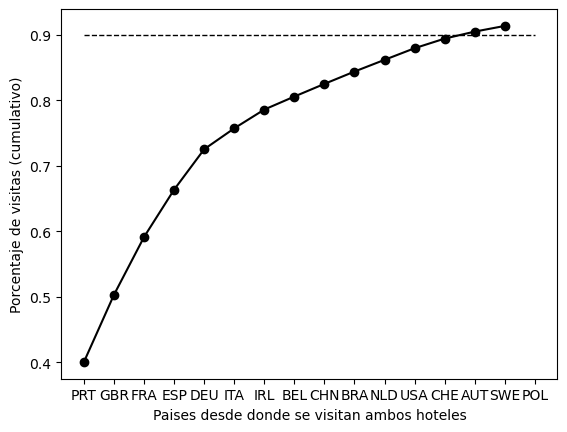

In [13]:
x = temp.index
y = temp.cumsum().head(15)

fig, ax = plt.subplots()
ax.scatter(x[:15],y, color = 'black')
ax.plot(x[:15], y, color = 'black')
ax.hlines(y=.9, xmin=x[0], xmax=x[15], linewidth=1, linestyles="--",color='black')
plt.xlabel("Paises desde donde se visitan ambos hoteles")
plt.ylabel("Porcentaje de visitas (cumulativo)")

#plt.show()

Se puede observar que de los 177 paises desde los cuales se visitan ambos hoteles, el 90% de estas visitas puede ser explicado unicamente por 15 países (menos del 10% del total)

En el caso general estos países son: Portugal, Reino Unido, Francia, Alemania, Italia, Irlanda, Bélgica, China, Brasil, Países bajos, EUA, Checoslovaquia  y Austria


In [14]:
city = df[df['hotel'] == 'City Hotel']
resort = df[df['hotel'] == 'Resort Hotel']

In [15]:
city_temp = city['country'].value_counts()
city_temp = city_temp/len(city)
city_temp.cumsum()

PRT    0.383559
FRA    0.495731
DEU    0.573226
GBR    0.641031
ESP    0.699671
         ...   
NAM    0.999949
MLI    0.999962
BFA    0.999974
MMR    0.999987
VGB    1.000000
Name: country, Length: 166, dtype: float64

Text(0, 0.5, 'Porcentaje de visitas a City hotel (cumulativo)')

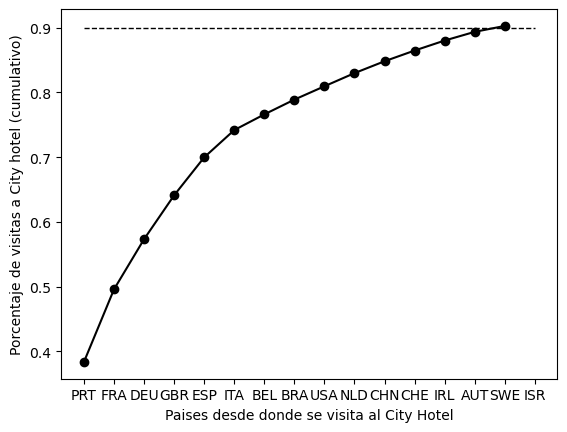

In [16]:
x = city_temp.index
y = city_temp.cumsum().head(15)

fig, ax = plt.subplots()
ax.scatter(x[:15],y, color = 'black')
ax.plot(x[:15], y, color = 'black')
ax.hlines(y=.9, xmin=x[0], xmax=x[15], linewidth=1, linestyles="--",color='black')
plt.xlabel("Paises desde donde se visita al City Hotel")
plt.ylabel("Porcentaje de visitas a City hotel (cumulativo)")


En el caso del City hotel el comportamiento es el mismo, pero los países cambian. En este caso son: Portugal, Francia, Alemania, Reino Unido, España, Italia, Belgica, Brazil, EUA, Países Bajos, China, Checoslovaquia, Irlanda y Suecia

In [17]:
resort_temp = resort['country'].value_counts()
resort_temp = resort_temp/len(resort)
resort_temp.head(15)

PRT     0.434390
GBR     0.171924
ESP     0.099420
IRL     0.054976
FRA     0.040628
DEU     0.030325
CHN     0.021344
NLD     0.013025
USA     0.012135
ITA     0.011601
NULL    0.011473
BEL     0.011219
CHE     0.010939
BRA     0.010837
POL     0.008268
Name: country, dtype: float64

Text(0, 0.5, 'Porcentaje de visitas a Resort hotel (cumulativo)')

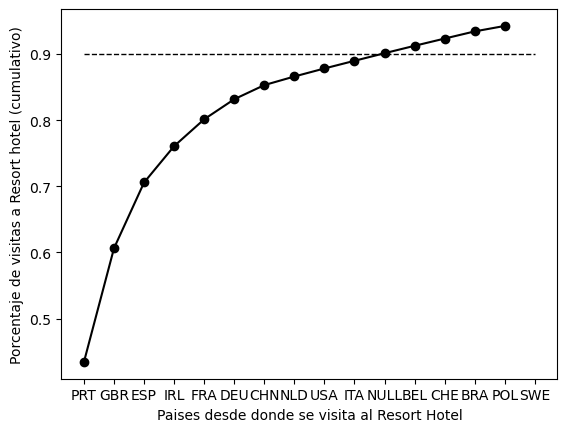

In [18]:
x = resort_temp.index
y = resort_temp.cumsum().head(15)

fig, ax = plt.subplots()
ax.scatter(x[:15],y, color = 'black')
ax.plot(x[:15], y, color = 'black')
ax.hlines(y=.9, xmin=x[0], xmax=x[15], linewidth=1, linestyles="--",color='black')
plt.xlabel("Paises desde donde se visita al Resort Hotel")
plt.ylabel("Porcentaje de visitas a Resort hotel (cumulativo)")

En el caso del Resort Hotel el analisis es otro, como se puede observar en la grafica fue necesario de menos países para explicar el 90% de la visitas, aunque en este caso las visitas sin registro del país de proviniencia representan aproximadamente el 1% de las visitas. Por su parte, la lista de países para este analisis es: Portugal, Reino Unido, España, Irlanda, Francia, Alemania, China, Países bajos, EUA, Italia, País de proviniencia desconocido y Belgica.

***-¿Cuánto pagan los huéspedes por una habitación por noche en promedio?***   

costo promedio por noche en ambos hoteles y todos los tipos de cuartos

In [19]:
df['adr'].describe()

count    117429.000000
mean        103.485715
std          46.708039
min           0.260000
25%          70.530000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

Costo promedio por cuarto en ambos hoteles y separado por tipo de cuarto

In [20]:
costo_tcuarto = df[df['adr'] > 0].groupby(['reserved_room_type'])
costo_tcuarto['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
reserved_room_type,,,,,,,,
A,84572.0,92.259544,36.046344,0.50,65.00,89.10,112.59,510.00
B,1085.0,93.108737,31.185172,1.60,77.39,88.77,103.69,284.10
C,913.0,163.550986,68.382295,8.00,114.30,164.20,213.75,367.00
D,19005.0,121.927494,46.656100,0.26,87.00,121.50,150.90,375.50
E,6423.0,126.711828,58.144319,1.29,79.20,115.00,167.00,451.50
F,2824.0,172.024405,58.321053,2.00,140.60,177.30,210.00,392.00
G,2006.0,183.716690,71.984688,1.00,124.14,180.00,240.00,426.25
H,595.0,190.121160,73.867922,26.00,130.00,184.80,241.00,437.00
L,6.0,124.666667,69.451182,8.00,95.50,143.00,166.50,200.00


In [153]:
df['adr'].value_counts()

y = df['adr'].value_counts().to_xarray()
x = df['adr'].value_counts().index

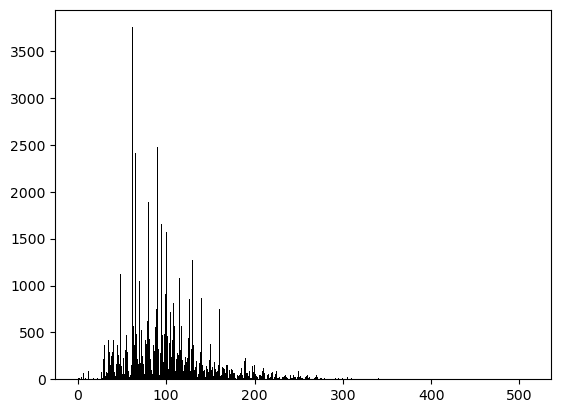

In [154]:
plt.bar(x,y, color = 'black')
plt.show()

In [22]:
dataset = df['adr']
#shapiro(dataset)
kstest(dataset, 'norm')

KstestResult(statistic=0.999619181613935, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)

Despues de un analisis grafico y tras realizar la prueba de normalidad de Kolmogorov-Smirnov podemos observar un p-value de 0, por lo que rechazamos la hipotesis nula de la prueba, es decir, nuestra distribución no es normal.

Existe un costo promedio de 103.48 euros por noche entre ambos hoteles y entre 2015 y 2017.

De este costo, se considera necesario hacer el analisis diferenciando el tipo de cuarto que se reservó, pues como se puede ver en la tabla de arriba, el costo promedio entre cuarto varia bastante, siendo el minimo entre ellos 92.25 euros y el maximo 190.12 euros.

Costo promedio por noche en city hotel y todos los tipos de cuarto

In [23]:
costo_city = city[city['adr'] > 0]
costo_city['adr'].describe()

count    78121.000000
mean       106.865033
std         37.388182
min          0.500000
25%         80.000000
50%        100.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

Costo promedio por noche en city hotel separado por tipo de cuarto

In [24]:
costo_city_tcuarto = costo_city.groupby(['reserved_room_type'])
costo_city_tcuarto['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
reserved_room_type,,,,,,,,
A,61683.0,97.584735,28.612641,0.50,75.0000,94.50,115.0000,510.00
B,1082.0,93.076691,31.191475,1.60,77.4175,88.77,103.6425,284.10
C,11.0,108.795455,40.305834,65.00,84.8750,104.00,121.0000,212.00
D,11652.0,132.770185,34.228255,1.48,109.2300,132.30,154.0000,375.50
E,1506.0,161.690259,42.705819,1.29,129.6000,162.00,190.0000,451.50
F,1759.0,192.702172,40.514452,6.00,167.9500,190.00,220.6300,349.63
G,428.0,228.204299,53.661120,1.00,202.3700,227.25,265.0000,372.33


Para el city hotel el promedio de costo por noche es de 106.86 euros. De la misma manera tambien se muestra el desglose de el costo promedio por tipo de cuarto, siendo el minimo de 93.07 euro y el maximo de 228.20 euros

Costo promedio por noche en resort hotel y todos los tipos de cuarto

In [25]:
costo_resort = resort[resort['adr'] > 0]
costo_resort['adr'].describe()

count    39308.000000
mean        96.769633
std         60.593503
min          0.260000
25%         52.000000
50%         76.800000
75%        126.402500
max        508.000000
Name: adr, dtype: float64

Costo promedio por noche en city hotel separado por tipo de cuarto

In [26]:
costo_resort_tcuarto = costo_resort.groupby(['reserved_room_type'])
costo_resort_tcuarto['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
reserved_room_type,,,,,,,,
A,22889.0,77.908818,48.087029,2.00,44.3600,62.750,92.250,508.00
B,3.0,104.666667,32.331615,70.00,90.0000,110.000,122.000,134.00
C,902.0,164.218736,68.396981,8.00,118.1000,165.000,214.000,367.00
D,7353.0,104.745523,57.345547,0.26,63.0000,84.000,135.000,350.75
E,4917.0,115.998483,58.038741,2.00,72.0000,99.000,148.400,382.00
F,1065.0,137.872113,66.618728,2.00,85.0000,121.000,181.540,392.00
G,1578.0,171.650342,71.593510,8.00,113.0725,157.125,219.385,426.25
H,595.0,190.121160,73.867922,26.00,130.0000,184.800,241.000,437.00
L,6.0,124.666667,69.451182,8.00,95.5000,143.000,166.500,200.00


In [27]:
costos_prom = pd.DataFrame(index = ['A','B','C','D','E','F','G','H','L'], columns=['ambos_hoteles', 'city_hotel', 'resort_hotel'])
costos_prom['ambos_hoteles'] = costo_tcuarto['adr'].mean()
costos_prom['city_hotel'] = costo_city_tcuarto['adr'].mean()
costos_prom['resort_hotel'] = costo_resort_tcuarto['adr'].mean()

costos_prom.fillna(0, inplace = True)
costos_prom

,ambos_hoteles,city_hotel,resort_hotel
A,92.259544,97.584735,77.908818
B,93.108737,93.076691,104.666667
C,163.550986,108.795455,164.218736
D,121.927494,132.770185,104.745523
E,126.711828,161.690259,115.998483
F,172.024405,192.702172,137.872113
G,183.716690,228.204299,171.650342
H,190.121160,0.000000,190.121160
L,124.666667,0.000000,124.666667


Para el city hotel el promedio de costo por noche es de 96.76 euros. De la misma manera tambien se muestra el desglose de el costo promedio por tipo de cuarto, siendo el minimo de 77.90 euros y el maximo de 190.12 euros

***-¿Cómo varía el precio por noche durante el año?***

Variacion del costo promedio por noche en ambos hoteles

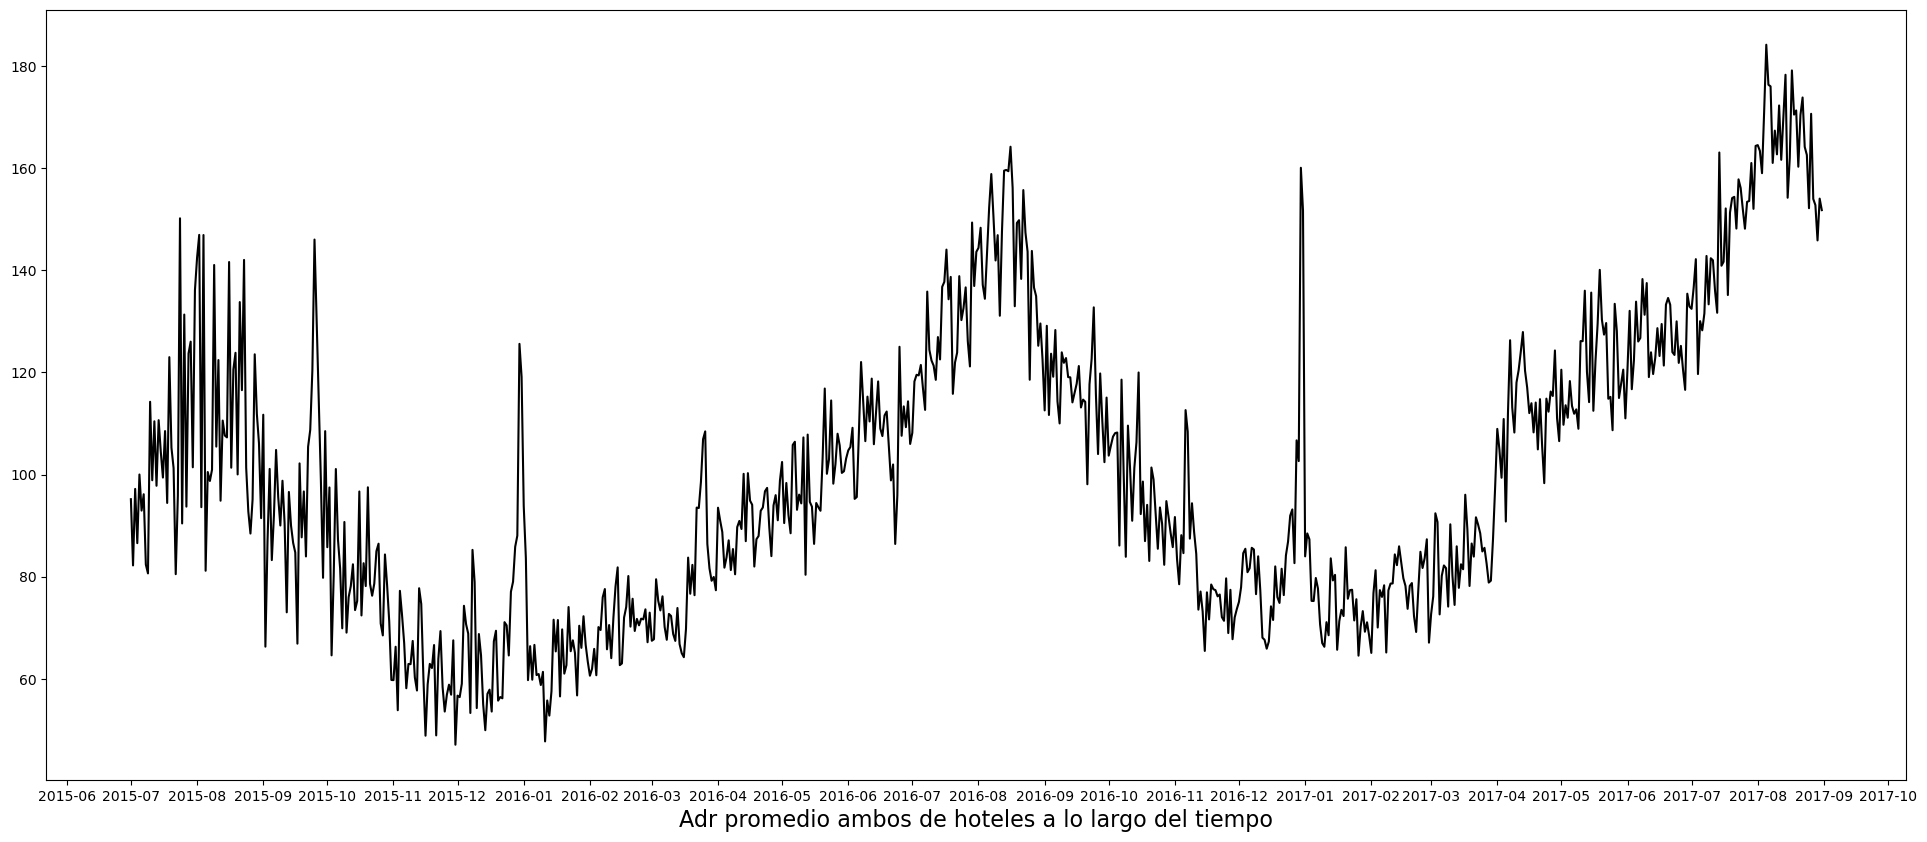

In [227]:
tiempo = df[0 < df['adr']].groupby(['period']).mean()
fig, ax = plt.subplots(figsize=(24,10))
ax.plot(tiempo.index, tiempo.adr, color = 'black')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xlabel("Adr promedio ambos de hoteles a lo largo del tiempo", fontsize = 16)
plt.show()

Variacion del costo promedio por noche en City hotel

In [29]:
tiempo_city = city[0 < city['adr']].groupby(['period']).mean()


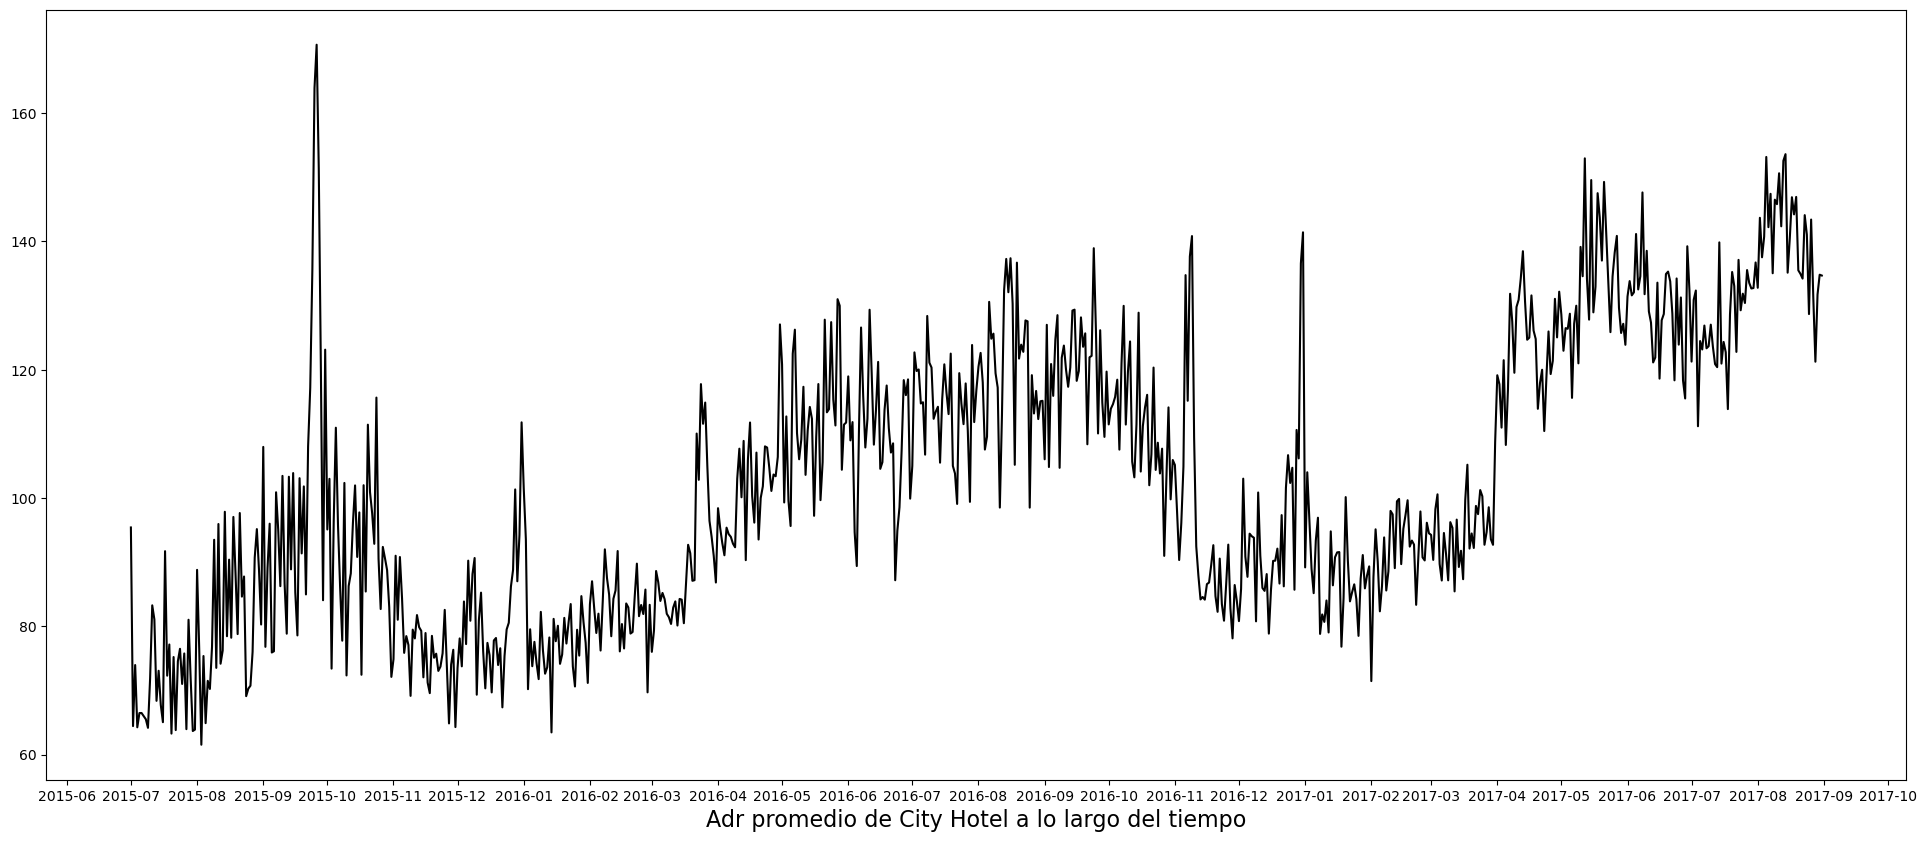

In [30]:
fig, ax = plt.subplots(figsize=(24,10))
ax.plot(tiempo_city.index, tiempo_city.adr, color = 'black')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xlabel("Adr promedio de City Hotel a lo largo del tiempo", fontsize = 16)
plt.show()

Variacion del costo promedio por noche en Resort hotel

In [31]:
tiempo_resort = resort[0 < resort['adr']].groupby(['period']).mean()
tiempo_resort.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cum_nights
period,,,,,,,,,,,,,,,,,,
2015-07-01,0.121951,62.390244,2015.0,27.0,1.0,0.975610,4.024390,1.853659,0.000000,0.024390,0.000000,0.219512,0.268293,0.0,94.698293,0.097561,0.707317,5.000000
2015-07-02,0.204545,69.750000,2015.0,27.0,2.0,1.522727,4.159091,2.045455,0.000000,0.022727,0.068182,0.068182,0.045455,0.0,101.975909,0.113636,0.704545,5.681818
2015-07-03,0.325000,83.075000,2015.0,27.0,3.0,1.250000,3.800000,2.100000,0.000000,0.000000,0.025000,0.000000,0.075000,0.0,106.468250,0.175000,0.625000,5.050000
2015-07-04,0.285714,96.897959,2015.0,27.0,4.0,1.816327,4.081633,1.938776,0.040816,0.000000,0.142857,0.000000,0.081633,0.0,103.862041,0.142857,0.836735,5.897959
2015-07-05,0.177778,75.177778,2015.0,28.0,5.0,2.222222,3.755556,1.955556,0.000000,0.022222,0.066667,0.000000,0.222222,0.0,105.960889,0.288889,0.422222,5.977778


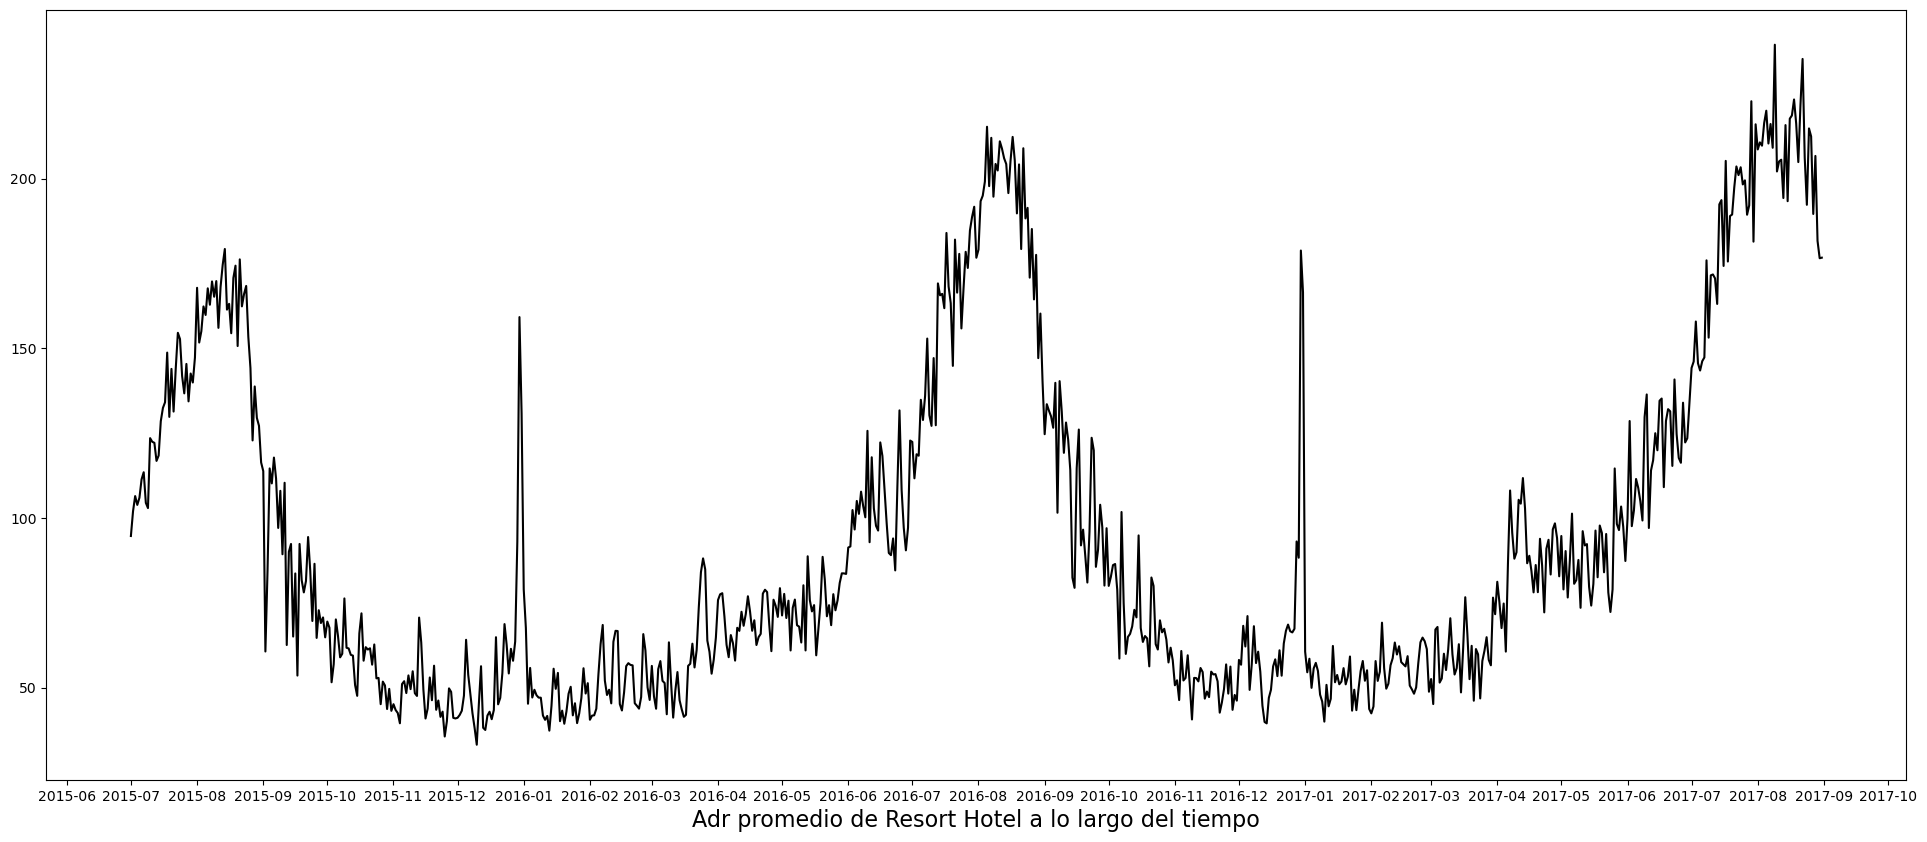

In [32]:
fig, ax = plt.subplots(figsize=(24,10))
ax.plot(tiempo_resort.index, tiempo_resort.adr, color = 'black')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xlabel("Adr promedio de Resort Hotel a lo largo del tiempo", fontsize = 16)
plt.show()

Podemos observar que el comportamiento del costo promedio por noche en ambos hoteles sigue un comportamiento ciclico con periodo de un 1 año. Si bien este comportamiento es especialmente notorio en el caso del Resort hotel donde la variación del precio es mayor a lo largo del año, teniendo sus puntos más altos entre agosto y octubre ademas de los ultimos días de diciembre y los primeros de enero, en el city hotel se tiene un aumento de precio que incia a mediados de abril y que termina en noviembre de cada año, además de, por su puesto, el aumento de precio esporadico en los ultimos días de diciembre y los primeros de enero.

In [62]:
#from persim import plot_diagrams

ModuleNotFoundError: No module named 'persim'

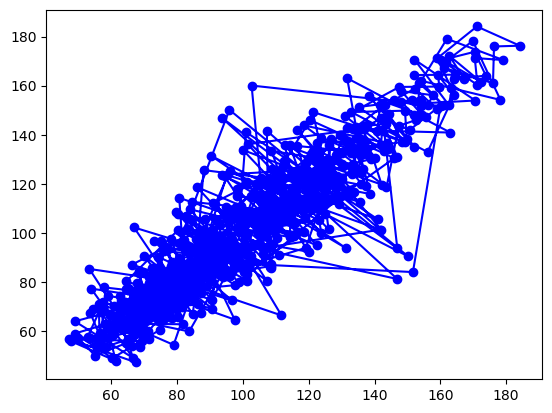

In [64]:
def embed(points,DimEmb=2):
    auxembed=[]
    for i in range(0,len(points)-DimEmb+1):
        aux=[points[i+j] for j in range(DimEmb)]
        auxembed.append(aux)
    auxembed=np.array(auxembed)
    return auxembed

embededcos=embed(tiempo.adr,DimEmb=2)
plt.plot(embededcos[:,0],embededcos[:,1],marker='o',color='blue')

In [38]:
#persim.plot_diagrams(
#   tiempo.adr, 
#    show=True
#) 

***-¿Cuáles son los meses más ocupados?***

In [101]:
df.arrival_date_month.value_counts()

August       13711
July         12491
May          11611
April        10953
October      10929
June         10819
September    10351
March         9640
February      7921
November      6641
December      6561
January       5801
Name: arrival_date_month, dtype: int64

In [155]:
y = df['arrival_date_month'].value_counts().to_xarray()
x = df['arrival_date_month'].value_counts().index

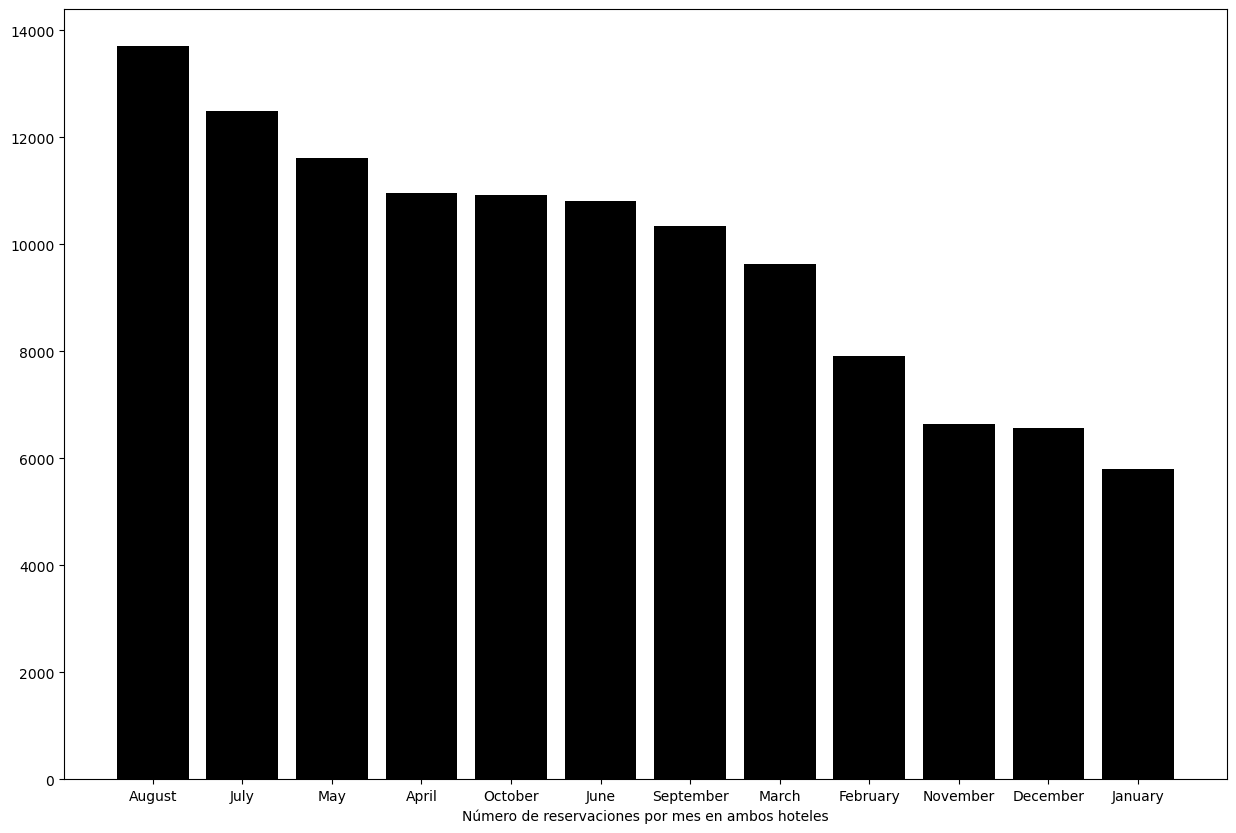

In [156]:
plt.figure(figsize=(15,10))
plt.bar(x,y, color = 'black')
plt.xlabel("Número de reservaciones por mes en ambos hoteles")
plt.show()


In [100]:
city['arrival_date_month'].value_counts()

August       8862
May          8121
July         7979
June         7816
October      7467
April        7406
September    7282
March        6368
February     4875
November     4266
December     4008
January      3671
Name: arrival_date_month, dtype: int64

In [147]:
y = city['arrival_date_month'].value_counts().to_xarray()
x = city['arrival_date_month'].value_counts().index

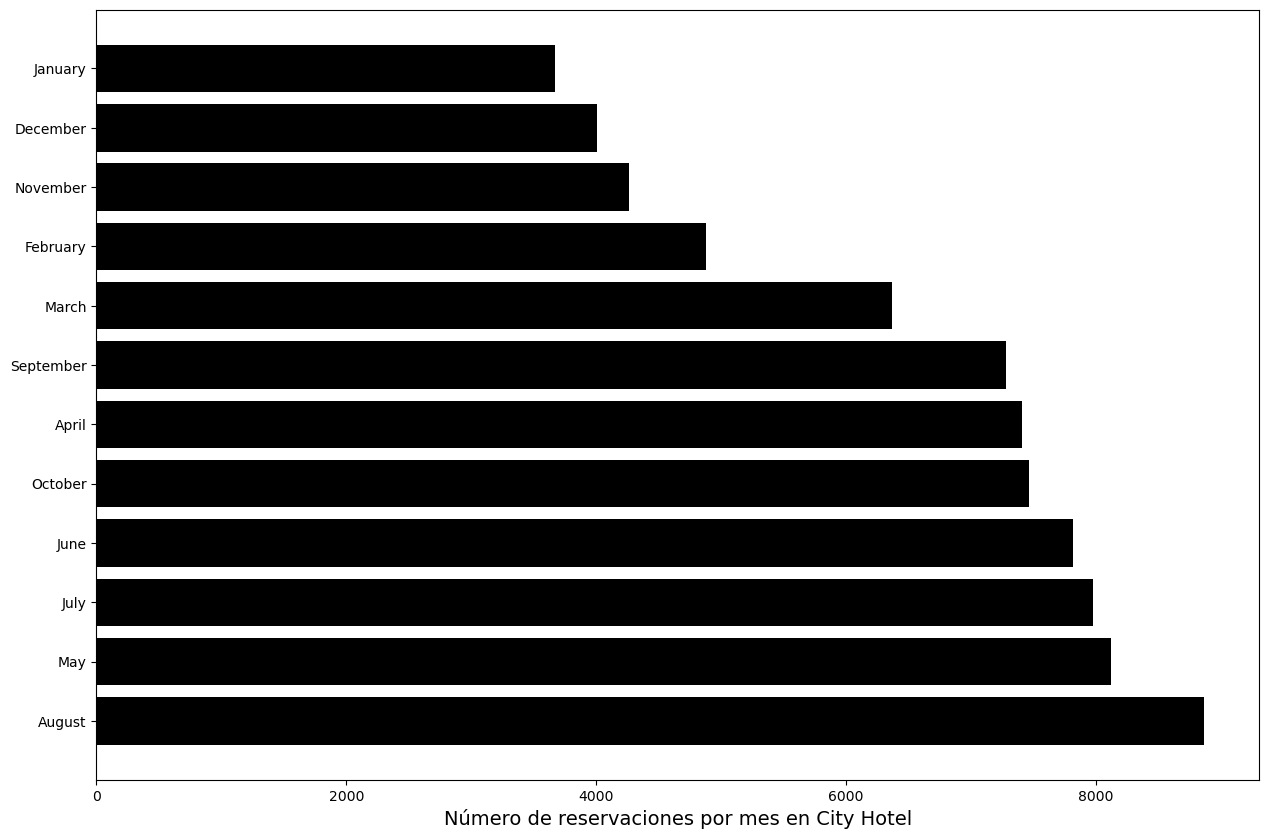

In [148]:
plt.figure(figsize=(15,10))
plt.barh(x,y, color = 'black', orientation= 'horizontal')
plt.xlabel("Número de reservaciones por mes en City Hotel", fontsize = 14)
plt.show()

In [145]:
y = resort['arrival_date_month'].value_counts().to_xarray()
x = resort['arrival_date_month'].value_counts().index


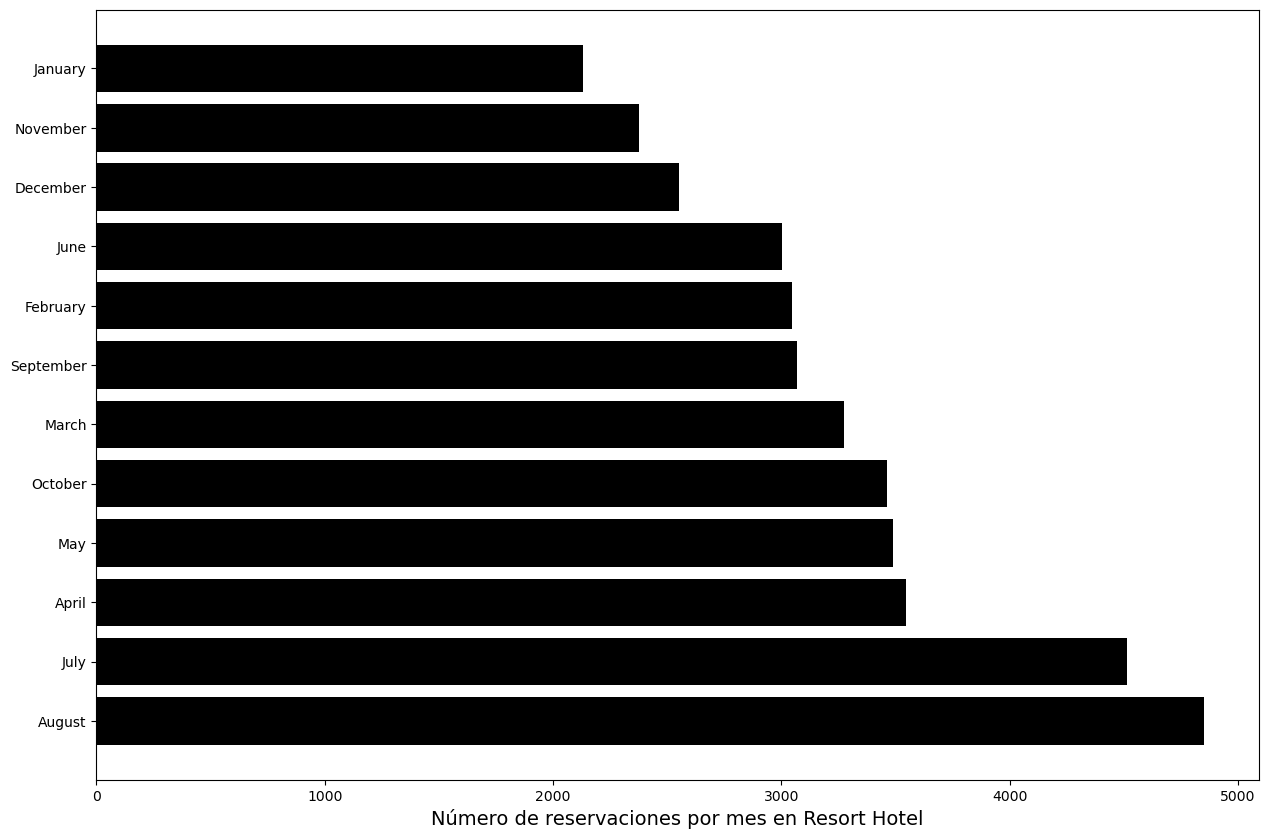

In [146]:
#fig, ax = plt.subplots()

plt.figure(figsize=(15,10))
plt.barh(x, y, color = 'black', orientation = 'horizontal')
plt.xlabel("Número de reservaciones por mes en Resort Hotel", fontsize = 14)
plt.show()

***-Reservas por segmento de mercado***


Ambos hoteles

In [170]:
df['market_segment'].value_counts()

Online TA        56110
Offline TA/TO    23886
Groups           19558
Direct           12366
Corporate         5213
Aviation           231
Complementary       63
Undefined            2
Name: market_segment, dtype: int64

In [225]:
y = df['market_segment'].value_counts().to_xarray()
x = df['market_segment'].value_counts().index

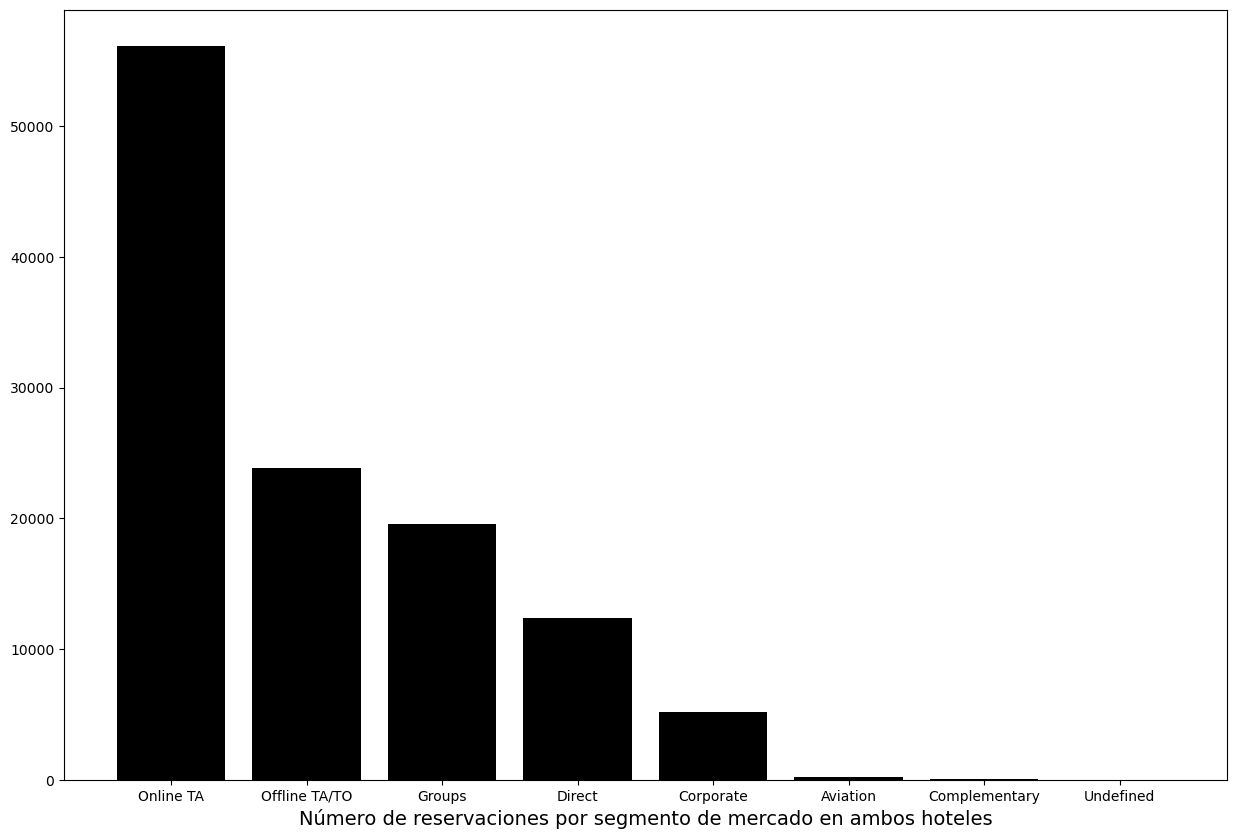

In [226]:
plt.figure(figsize=(15,10))
plt.bar(x,y, color = 'black')
plt.xlabel("Número de reservaciones por segmento de mercado en ambos hoteles",fontsize = 14)
plt.show()

City hotel

In [173]:
city['market_segment'].value_counts()

Online TA        38575
Offline TA/TO    16510
Groups           13831
Direct            5982
Corporate         2956
Aviation           231
Complementary       34
Undefined            2
Name: market_segment, dtype: int64

In [200]:
y = city['market_segment'].value_counts().to_xarray()
x = city['market_segment'].value_counts().index

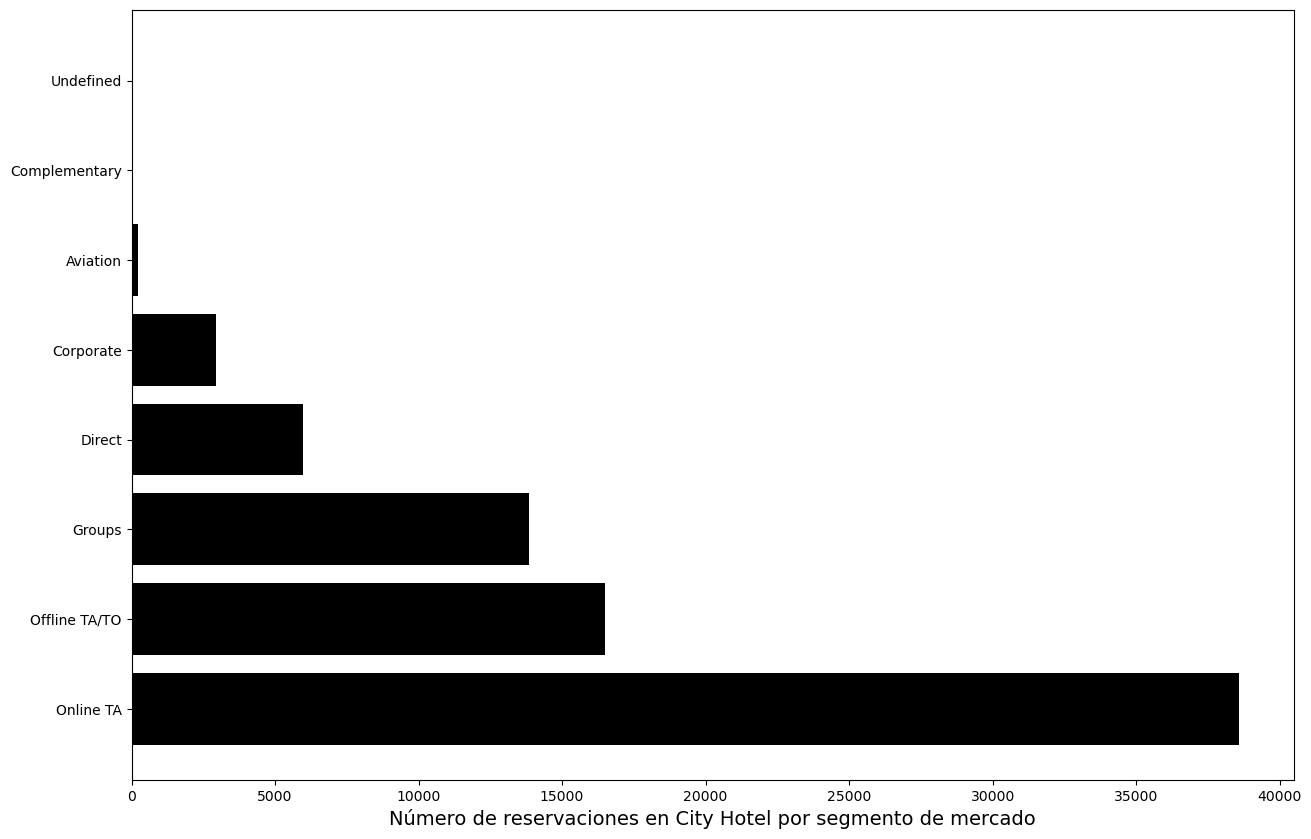

In [201]:
plt.figure(figsize=(15,10))
plt.barh(x,y, color = 'black')
plt.xlabel("Número de reservaciones en City Hotel por segmento de mercado", fontsize = 14)
plt.show()

Resort Hotel

In [202]:
resort['market_segment'].value_counts()

Online TA        17535
Offline TA/TO     7376
Direct            6384
Groups            5727
Corporate         2257
Complementary       29
Name: market_segment, dtype: int64

In [203]:
y = resort['market_segment'].value_counts().to_xarray()
x = resort['market_segment'].value_counts().index

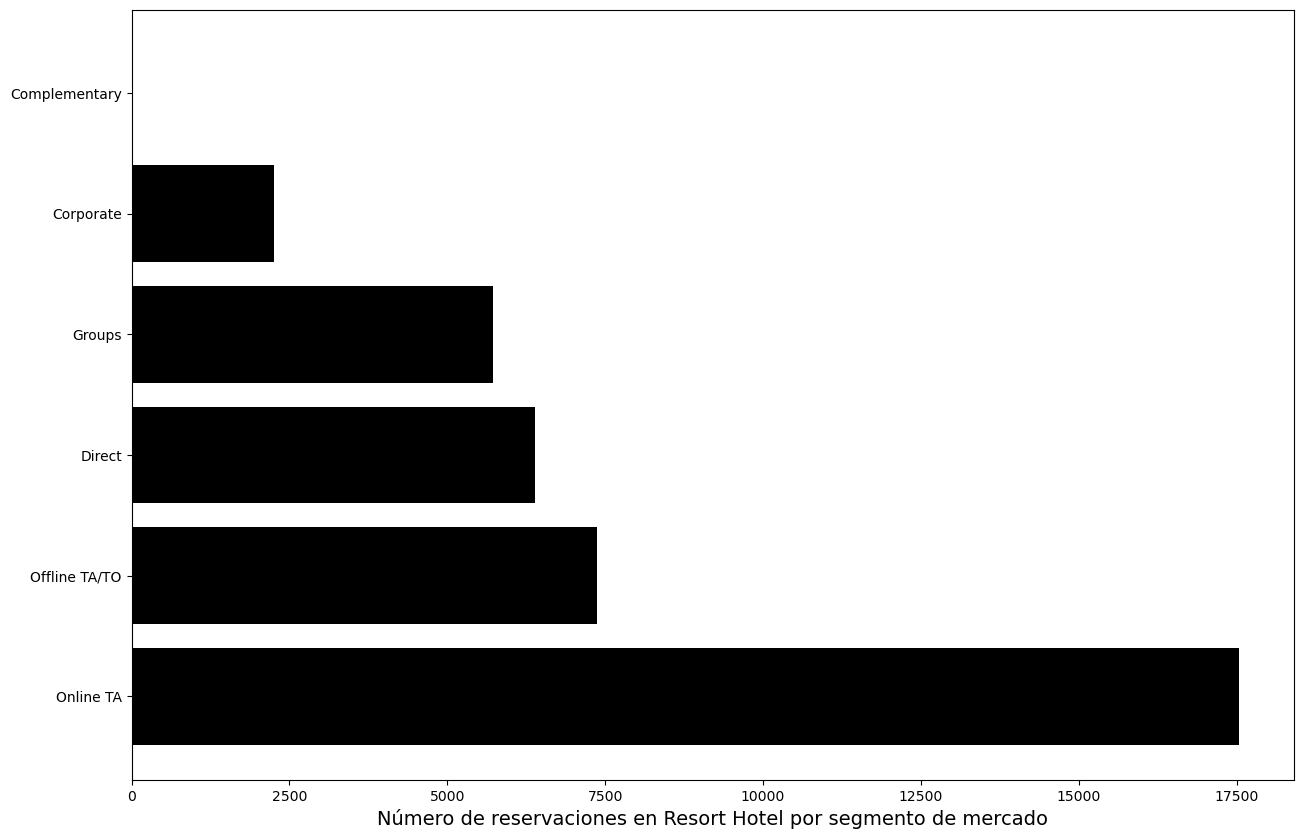

In [204]:
plt.figure(figsize=(15,10))
plt.barh(x,y, color = 'black')
plt.xlabel("Número de reservaciones en Resort Hotel por segmento de mercado", fontsize = 14)
plt.show()

***-¿Cuánto tiempo se queda la gente en los hoteles (noches)?***

In [205]:
df['cum_nights'].describe()

count    117429.000000
mean          3.457664
std           2.534835
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: cum_nights, dtype: float64

In [206]:
city['cum_nights'].describe()

count    78121.000000
mean         2.998720
std          1.827248
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         57.000000
Name: cum_nights, dtype: float64

In [207]:
resort['cum_nights'].describe()

count    39308.000000
mean         4.369772
std          3.362929
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         69.000000
Name: cum_nights, dtype: float64

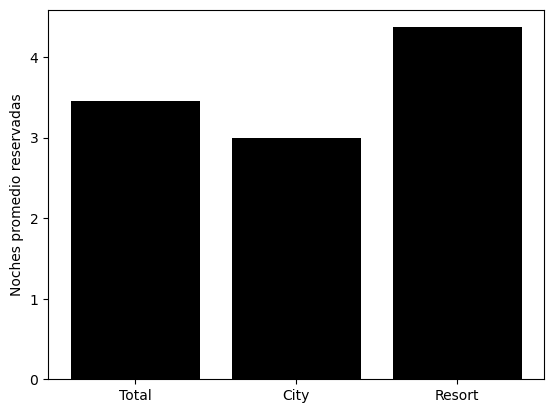

In [208]:
x = ['Total', 'City', 'Resort']
y = [df['cum_nights'].mean(), city['cum_nights'].mean(), resort['cum_nights'].mean()]


plt.bar(x,y, color = 'black')
plt.ylabel("Noches promedio reservadas")
plt.show()

Podemos observar que en promedio el Resort hotel es reservado por más noches con 4.36 noches promedio reservadas, teniendo el city hotel solamente 2.99 noches promedio.

***-¿Cuántas reservas se cancelaron?***


Cancelaciones en general

In [209]:
df['is_canceled'].sum()

44010

In [210]:
df['is_canceled'].sum()/len(df)

0.37477965408885366

Cancelaciones en City hotel

In [211]:
city['is_canceled'].sum()

32972

In [212]:
city['is_canceled'].sum()/len(city)

0.42206320963633337

Cancelaciones en Resort hotel

In [213]:
resort['is_canceled'].sum()

11038

In [214]:
resort['is_canceled'].sum()/len(resort)

0.28080797801974156

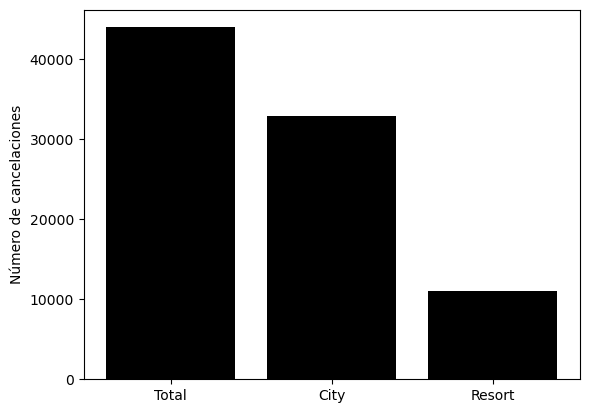

In [215]:
x = ['Total', 'City', 'Resort']
y = [df['is_canceled'].sum(), city['is_canceled'].sum(), resort['is_canceled'].sum()]


plt.bar(x,y, color = 'black')
plt.ylabel("Número de cancelaciones")
plt.show()

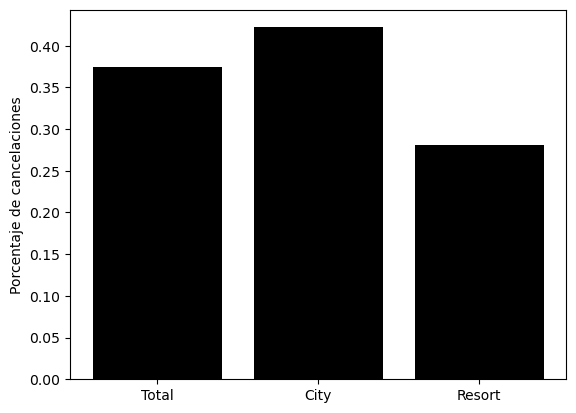

In [216]:
x = ['Total', 'City', 'Resort']
y = [df['is_canceled'].sum()/len(df), city['is_canceled'].sum()/len(city), resort['is_canceled'].sum()/len(resort)]


plt.bar(x,y, color = 'black')
plt.ylabel("Porcentaje de cancelaciones")
plt.show()

Podemos observar que el city hotel es quien tiene mayor porcentaje de cancelaciones con un 42.20% de las reservaciones registradas siendo canceladas, en el caso del resort hotel este porcentaje disminuye al 28.08%. Con estos dos datos concluimos que el 37.47% de todas las reservaciones registradas fueron canceladas.

***-¿Qué mes tiene el mayor número de cancelaciones?***

Cancelaciones por mes en general

In [217]:
cancelacion_mes = df.groupby(['arrival_date_month']).sum()
cancelacion_mes.sort_values(by = 'is_canceled', ascending = False, inplace = True)

Text(0.5, 0, 'Cancelaciones por mes en ambos hoteles')

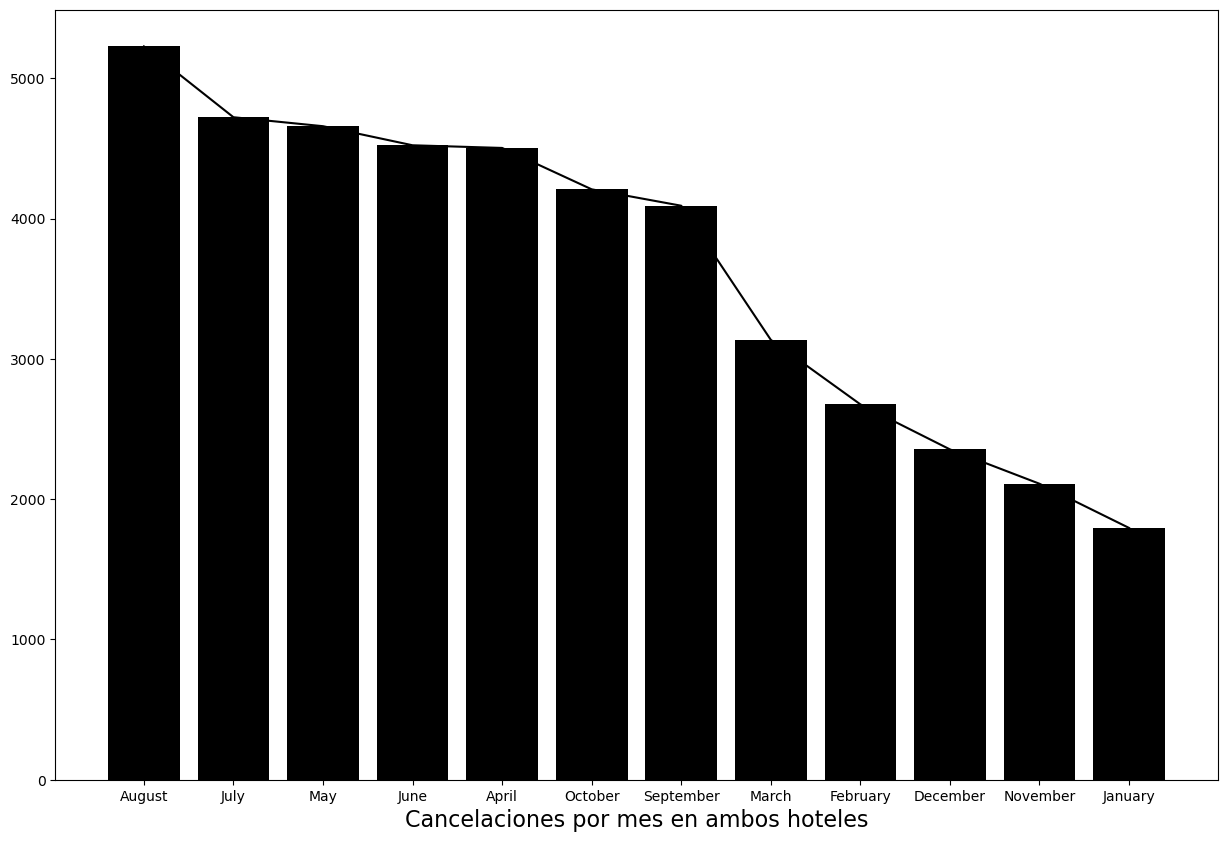

In [218]:
x, y = cancelacion_mes.index, cancelacion_mes.is_canceled

plt.figure(figsize=(15,10))
plt.bar(x,y, color = 'black')
plt.plot(x, y, color = 'black')
plt.xlabel("Cancelaciones por mes en ambos hoteles", fontsize = 16)


Mes con mayor cancelacion en city hotel

In [219]:
cancelacion_mes_city = city.groupby(['arrival_date_month']).sum()
cancelacion_mes_city.sort_values(by = 'is_canceled', ascending = False, inplace = True)

Text(0.5, 0, 'Cancelaciones por mes en City Hotel')

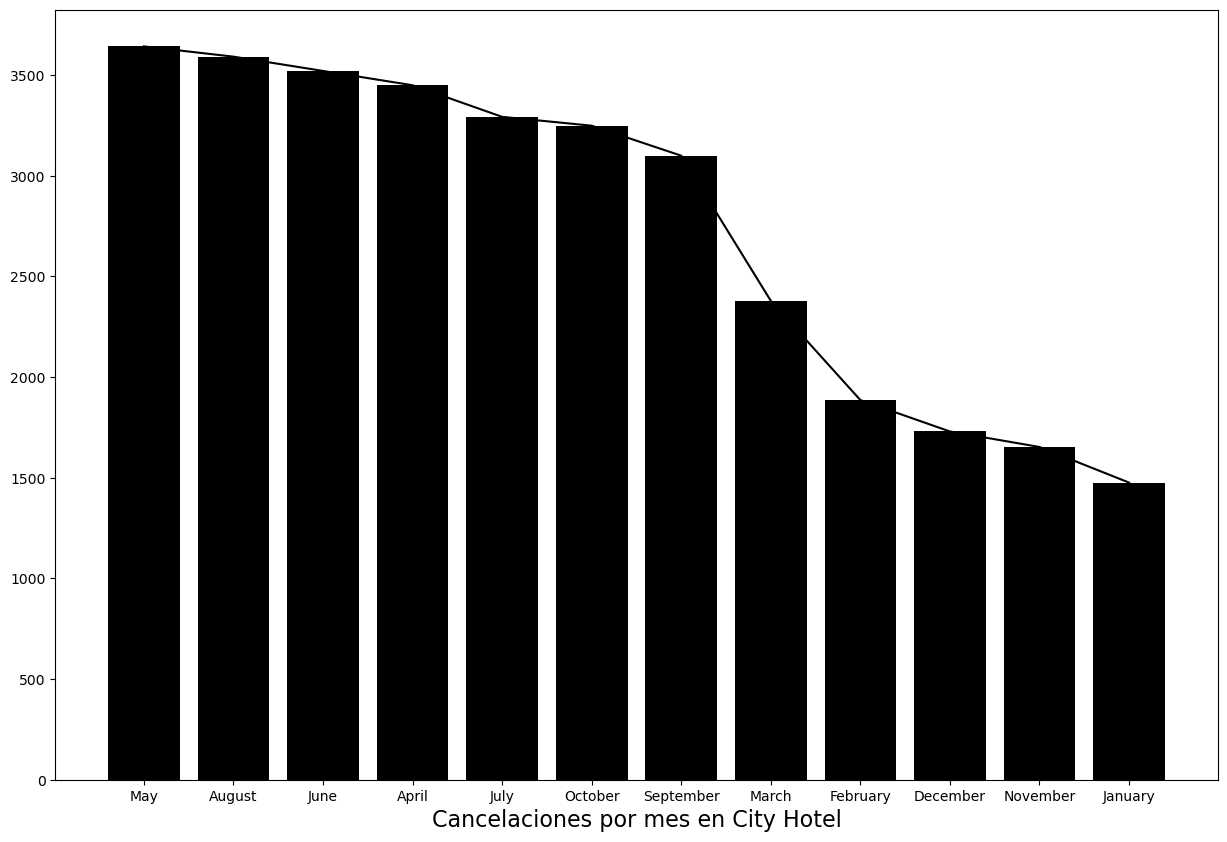

In [220]:
x, y = cancelacion_mes_city.index, cancelacion_mes_city.is_canceled

plt.figure(figsize=(15,10))
plt.bar(x,y, color = 'black')
plt.plot(x, y, color = 'black')
plt.xlabel("Cancelaciones por mes en City Hotel", fontsize = 16)


Cancelaciones por mes en resort hotel

In [221]:
cancelacion_mes_resort = resort.groupby(['arrival_date_month']).sum()
cancelacion_mes_resort.sort_values(by = 'is_canceled', ascending = False, inplace = True)

Text(0.5, 0, 'Cancelaciones por mes en Resort Hotel')

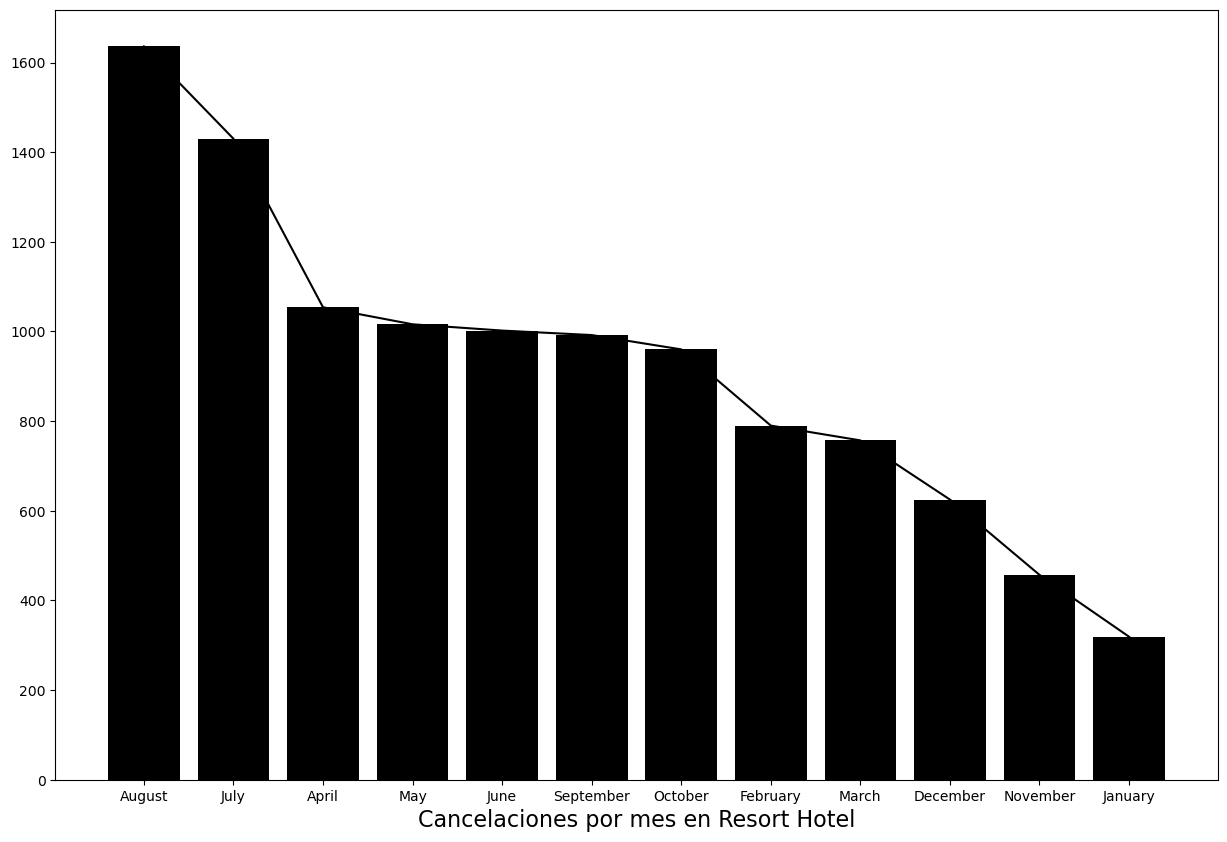

In [222]:
x, y = cancelacion_mes_resort.index, cancelacion_mes_resort.is_canceled

plt.figure(figsize=(15,10))
plt.bar(x,y, color = 'black')
plt.plot(x, y, color = 'black')
plt.xlabel("Cancelaciones por mes en Resort Hotel", fontsize = 16)


***-Hacer tabla de correlación para las variables***

In [223]:
corr = df.corr()
corr


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,cum_nights
is_canceled,1.000000,0.290551,0.014099,0.009564,-0.006318,-0.007089,0.018584,0.056949,-0.032461,-0.074561,0.110673,-0.054862,-0.144844,0.054127,0.030936,-0.197502,-0.237301,0.011099
lead_time,0.290551,1.000000,0.038498,0.129319,0.002004,0.079261,0.160169,0.122915,-0.020293,-0.111029,0.087466,-0.069512,0.001384,0.169539,-0.090969,-0.117638,-0.095149,0.150797
arrival_date_year,0.014099,0.038498,1.000000,-0.539155,-0.000106,0.018887,0.028709,0.042551,-0.012415,0.011014,-0.122209,0.028927,0.032161,-0.056942,0.206171,-0.016049,0.108023,0.028867
arrival_date_week_number,0.009564,0.129319,-0.539155,1.000000,0.067465,0.019722,0.017334,0.027909,0.009571,-0.032510,0.036142,-0.020712,0.007349,0.022311,0.089192,0.003548,0.027428,0.020697
arrival_date_day_of_month,-0.006318,0.002004,-0.000106,0.067465,1.000000,-0.016536,-0.029119,0.002165,-0.000287,-0.004072,-0.026851,0.001549,0.011255,0.021714,0.031092,0.008520,0.003423,-0.028251
stays_in_weekend_nights,-0.007089,0.079261,0.018887,0.019722,-0.016536,1.000000,0.489889,0.104051,0.019956,-0.074240,-0.012434,-0.038552,0.048407,-0.055826,0.035704,-0.019237,0.075672,0.758821
stays_in_week_nights,0.018584,0.160169,0.028709,0.017334,-0.029119,0.489889,1.000000,0.105760,0.021537,-0.079825,-0.014000,-0.045787,0.078140,-0.003961,0.048605,-0.025494,0.071240,0.939531
adults,0.056949,0.122915,0.042551,0.027909,0.002165,0.104051,0.105760,1.000000,0.021047,-0.166206,-0.006741,-0.126192,-0.049966,-0.008778,0.285119,0.017710,0.151607,0.119887
babies,-0.032461,-0.020293,-0.012415,0.009571,-0.000287,0.019956,0.021537,0.021047,1.000000,-0.009452,-0.007471,-0.006654,0.087887,-0.010566,0.034101,0.036802,0.096906,0.023929
is_repeated_guest,-0.074561,-0.111029,0.011014,-0.032510,-0.004072,-0.074240,-0.079825,-0.166206,-0.009452,1.000000,0.081403,0.416311,0.013519,-0.020539,-0.103189,0.083843,0.004704,-0.088800


<Axes: >

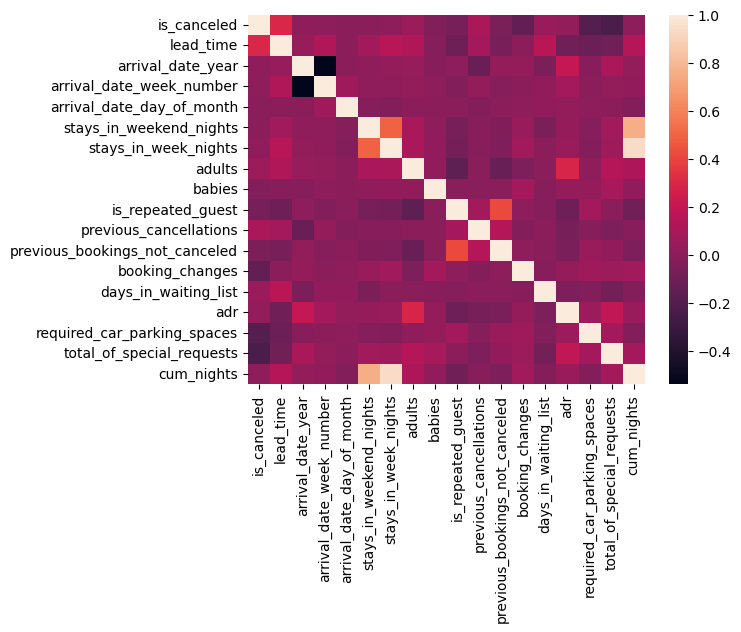

In [224]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

En el analisis de correlación no se encuentra un valor de correlación lo suficientemente significativo como para sugerir una relación entre la cancelación de una reservación y alguna de las variables presentes.

Por su parte las correlaciones más altas encontradas en la matriz estan en las columnas 'cum_nights', y 'stays_in_weekend_nights' y 'stays_in_week_nights' algo que no aporta nada al analisis de las variables.